In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Load Dataset
url = 'https://raw.githubusercontent.com/Egghead27/Project-Owl/refs/heads/main/Sleep_Health_and_Lifestyle_Dataset.csv'
dfb = pd.read_csv(url)
print('CSV Loaded from github')


CSV Loaded from github


In [3]:
dfb.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
#Dataset Info
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
#Dataset Descriptive Statistic
dfb.describe(include='all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


In [6]:
missing_values = dfb.isnull().sum()
missing_values[missing_values > 0]

Sleep Disorder    219
dtype: int64

In [7]:
dfb.duplicated().sum()

np.int64(0)

In [8]:
#Handle Missing Values
kategorical_features = dfb.select_dtypes(include=['object']).columns

for column in kategorical_features:
    dfb[column] = dfb[column].fillna('None')

In [9]:
missing_values = dfb.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [10]:
#Extract Blood Pleasure to Systolic and Diastolic
dfb[['Systolic', 'Diastolic']] = dfb['Blood Pressure'].str.split('/', expand=True).astype(int)

In [11]:
dfb.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


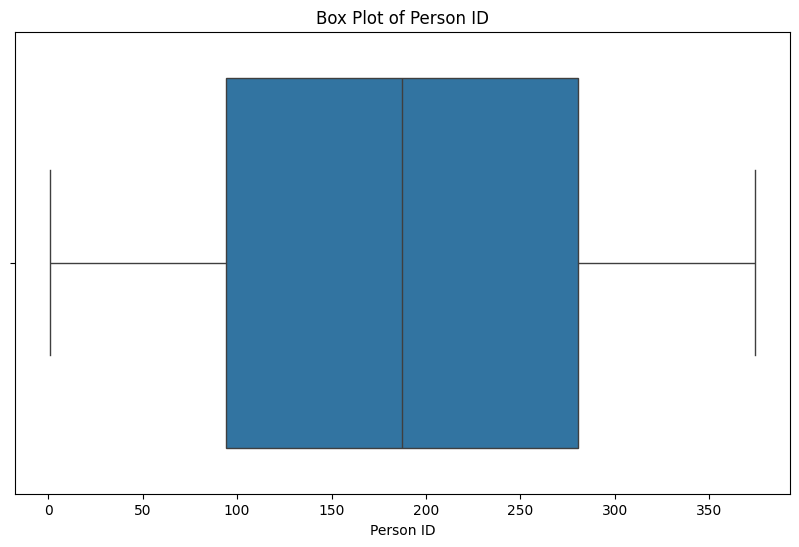

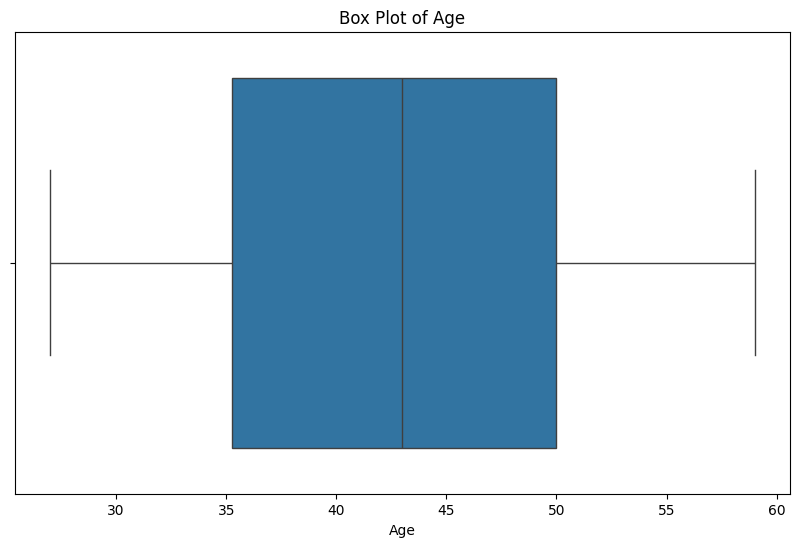

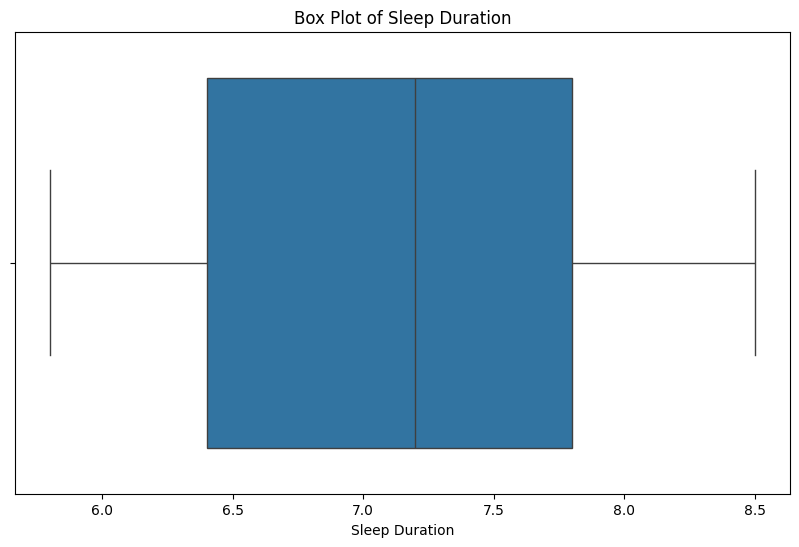

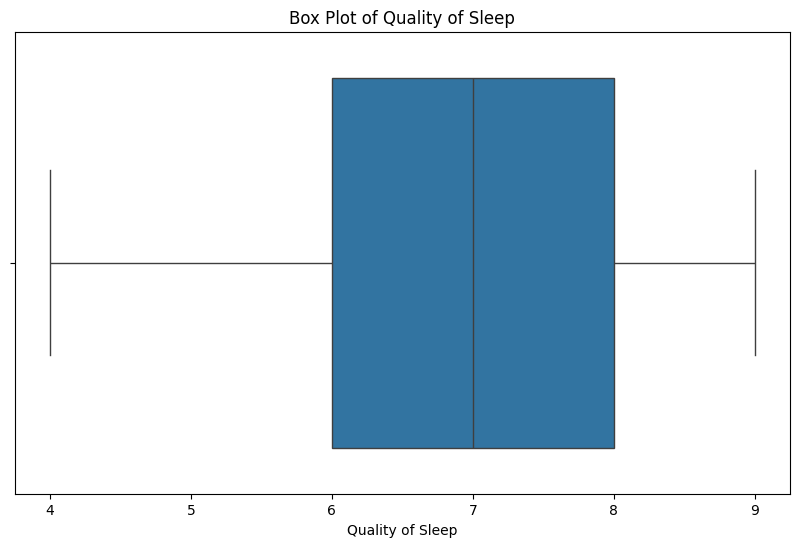

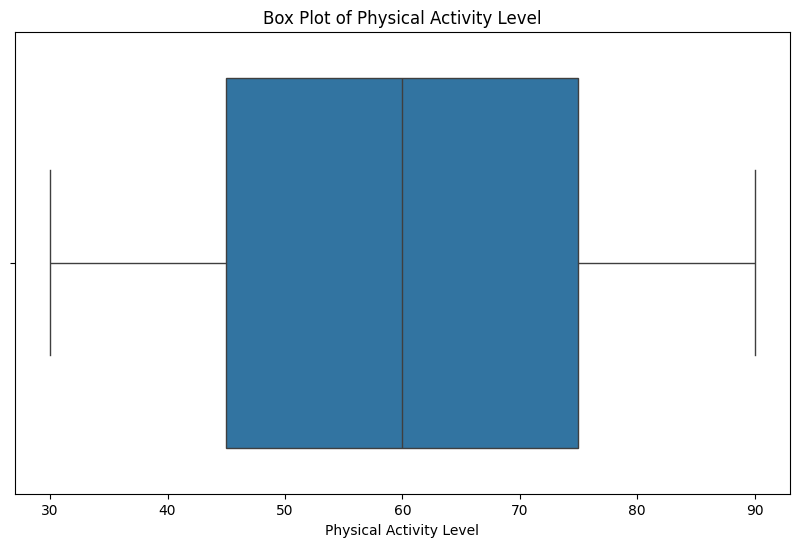

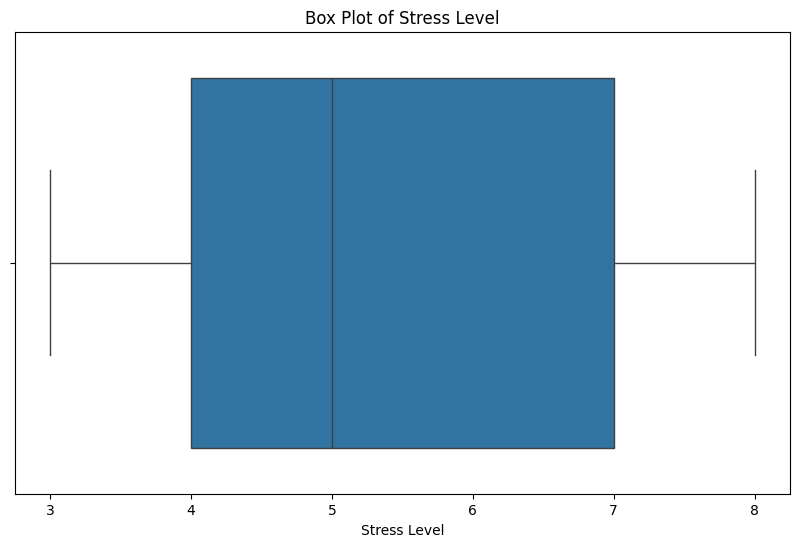

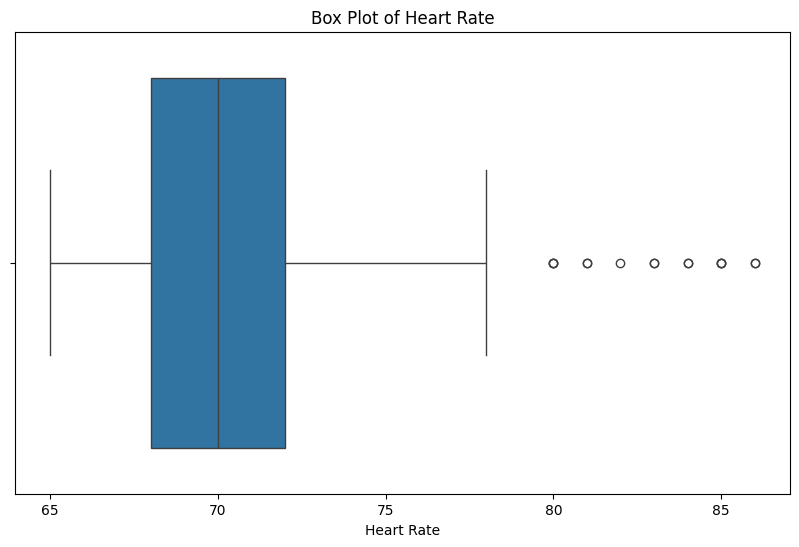

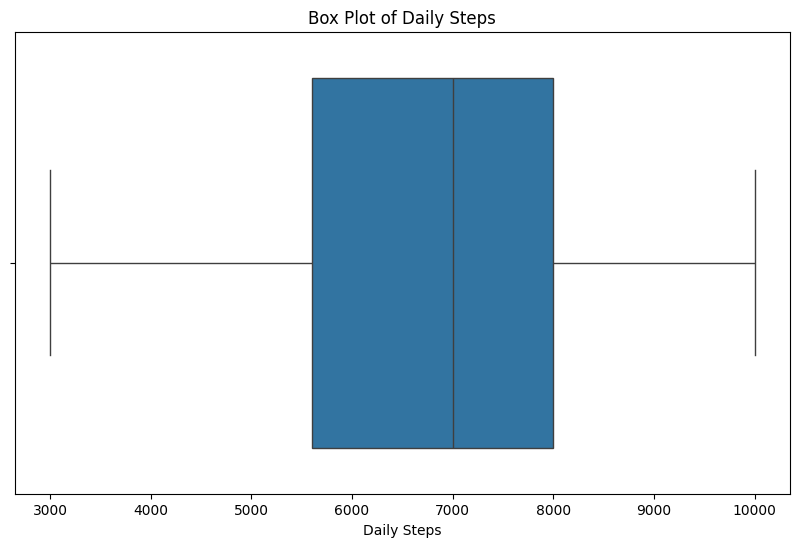

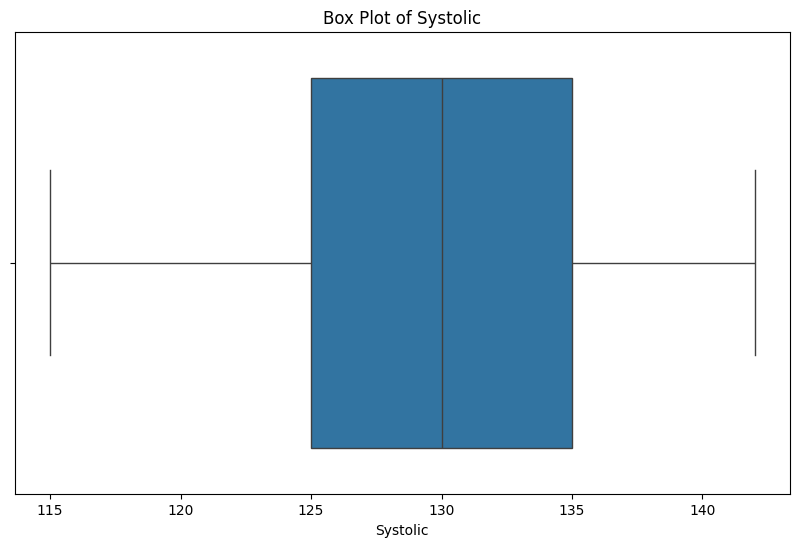

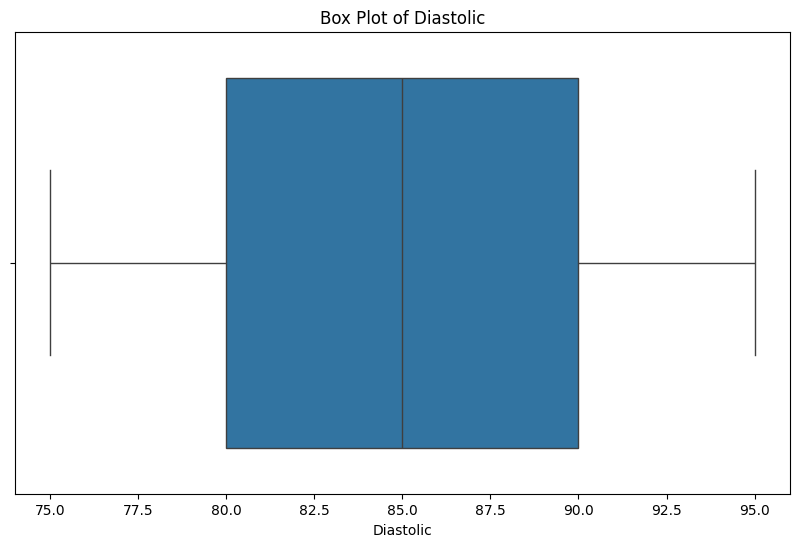

In [12]:
#Outlier Checking for Numerical Features
numerik_cols = dfb.select_dtypes(include=np.number).columns.tolist()

for feature in numerik_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=dfb[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [13]:
#Handle Outliers for Numerical Features
numerik_cols = dfb.select_dtypes(include=np.number).columns.tolist()
df_numerical = dfb[numerik_cols]

Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1

#Filter Dataframe based on numerical outliers
condition = ~((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR))).any(axis=1)
df = dfb.loc[condition].copy()

print(f"Outliers removed: {len(dfb) - len(df)} records")

Outliers removed: 15 records


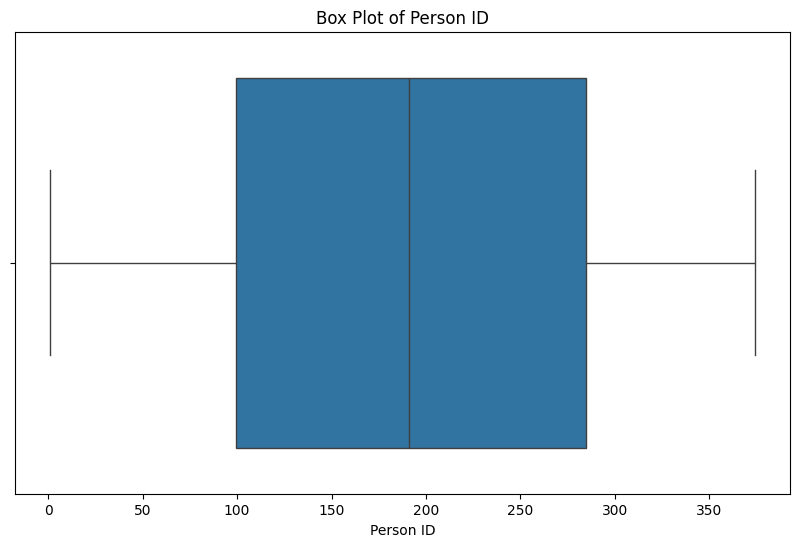

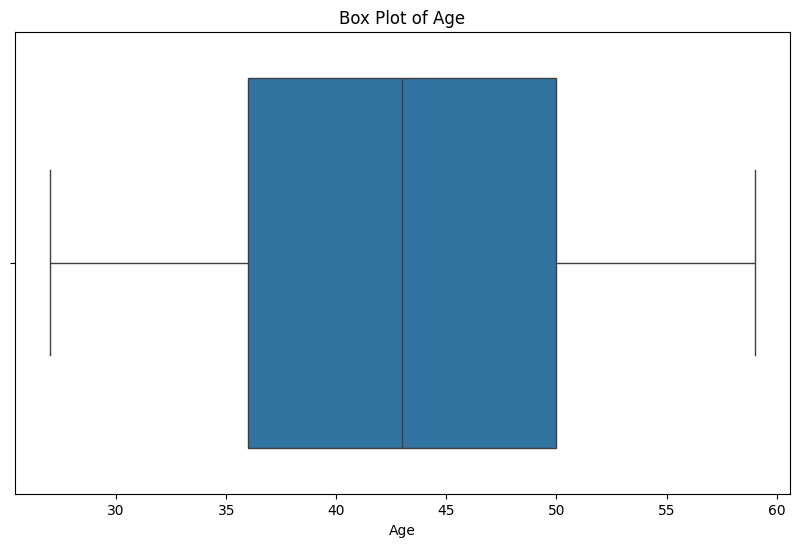

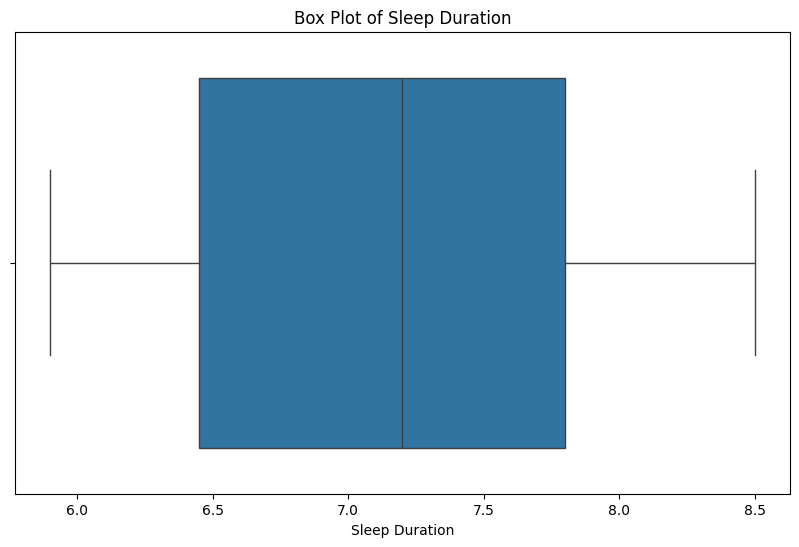

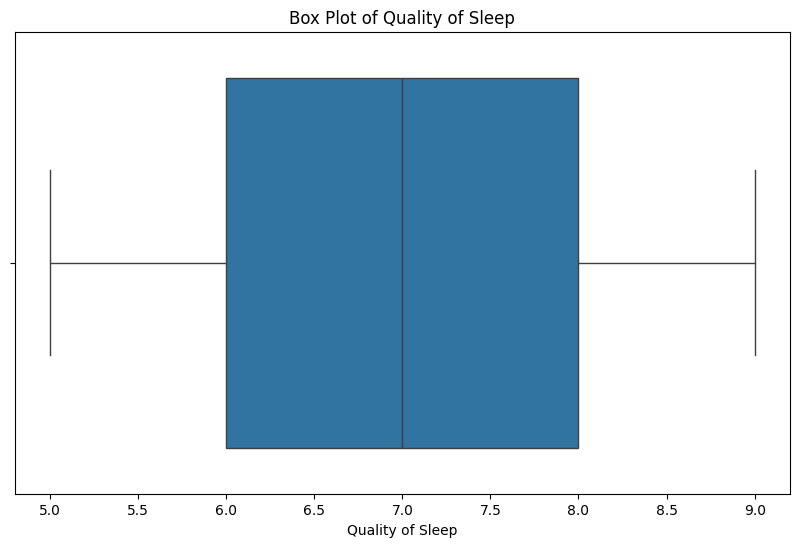

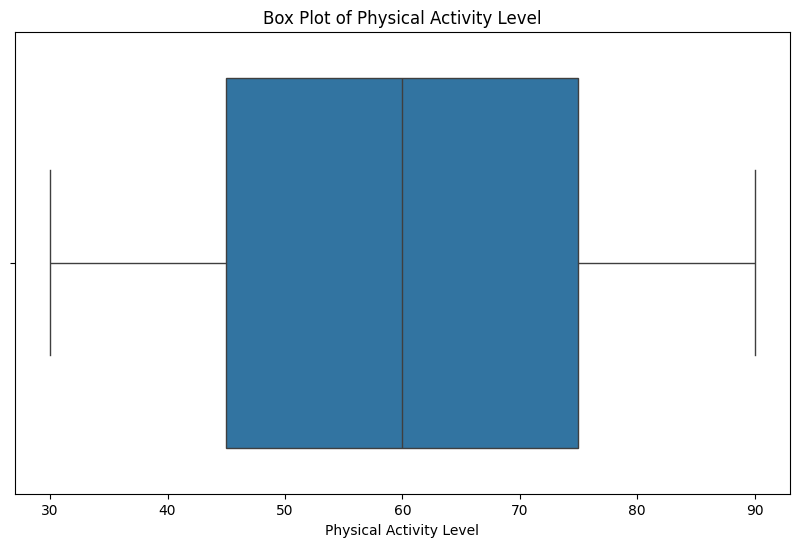

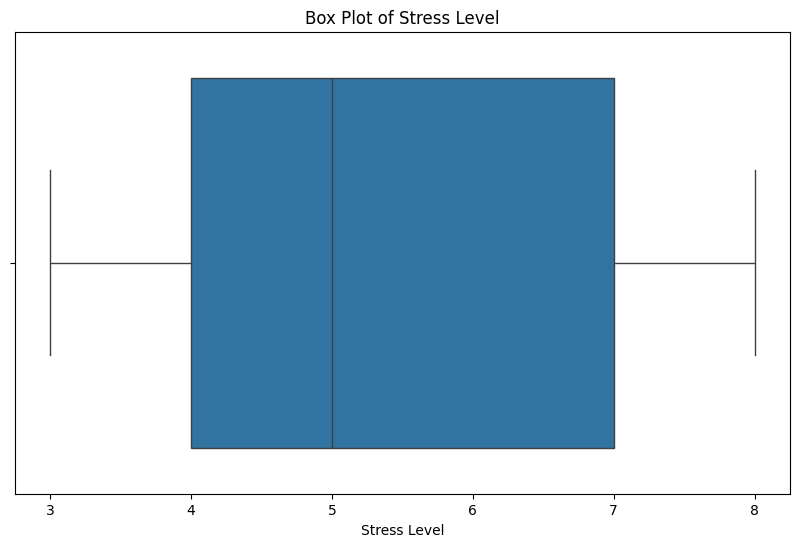

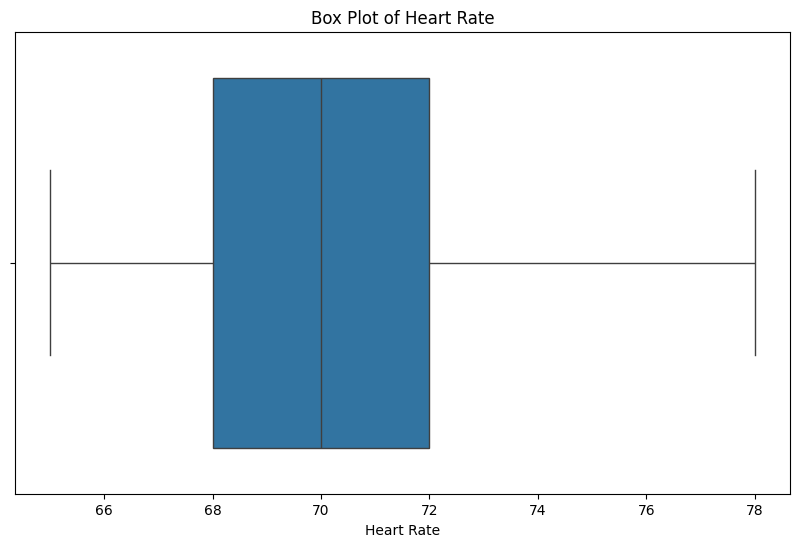

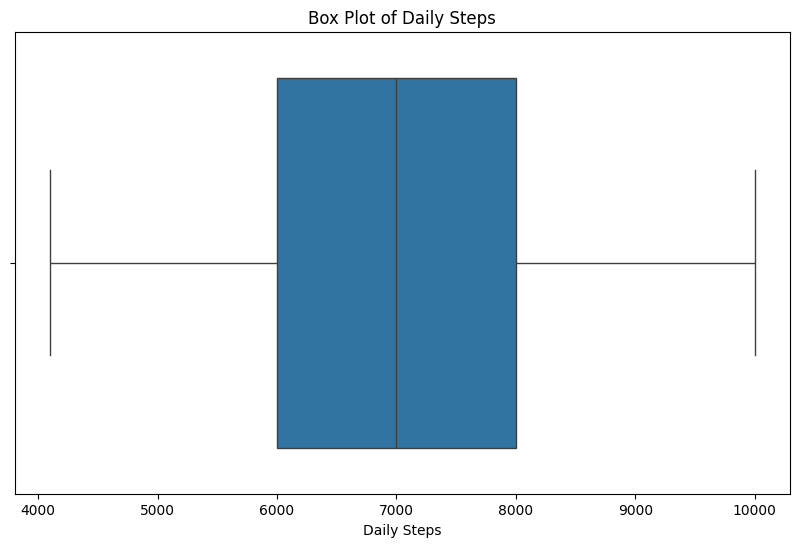

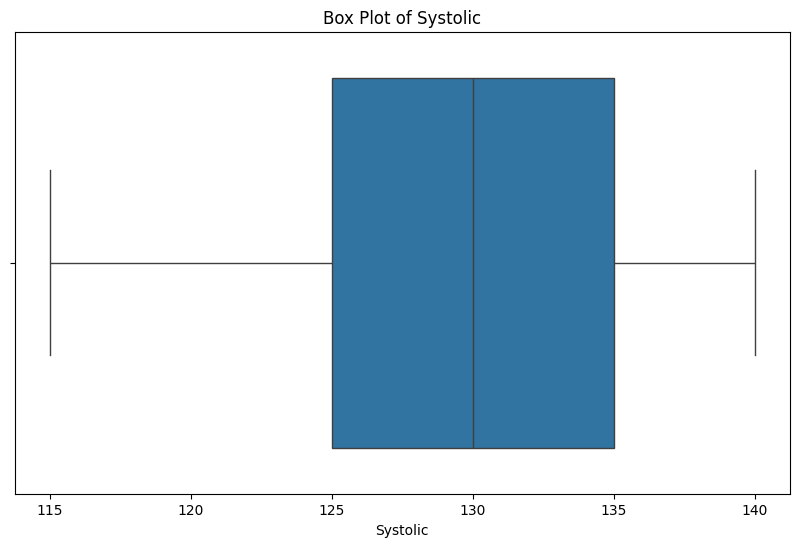

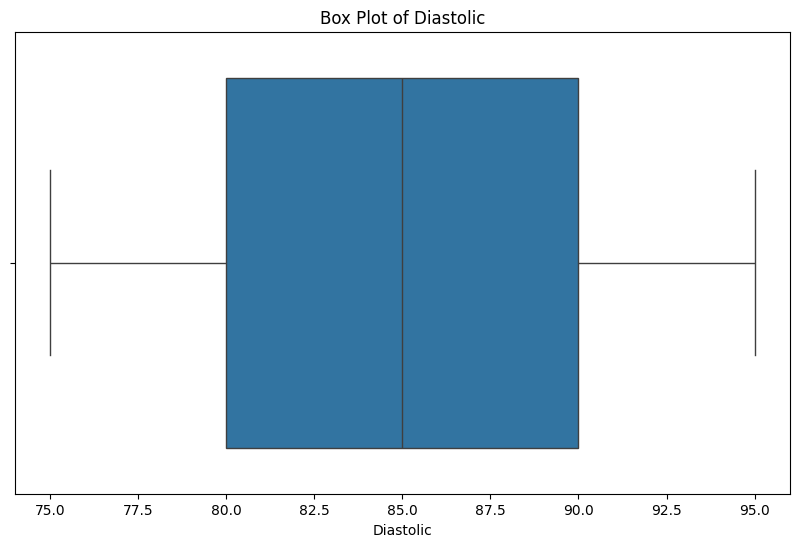

In [14]:
#Checking After Handling Outliers
numerik_cols = df.select_dtypes(include=np.number).columns.tolist()

for feature in numerik_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [15]:
df = df.drop(['Person ID'], axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80


In [16]:
# Create a productivity score (hypothetical)
# Lower stress, higher sleep quality, higher sleep duration = higher productivity
df['Productivity Score'] = ((10 - df['Stress Level']) * 0.3 +
                           df['Quality of Sleep'] * 0.4 +
                           (df['Sleep Duration']/30) * 0.3)

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Productivity Score
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,3.661
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,3.062
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,3.062
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,4.078
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,4.078


Exploratory Data Analysis (EDA)

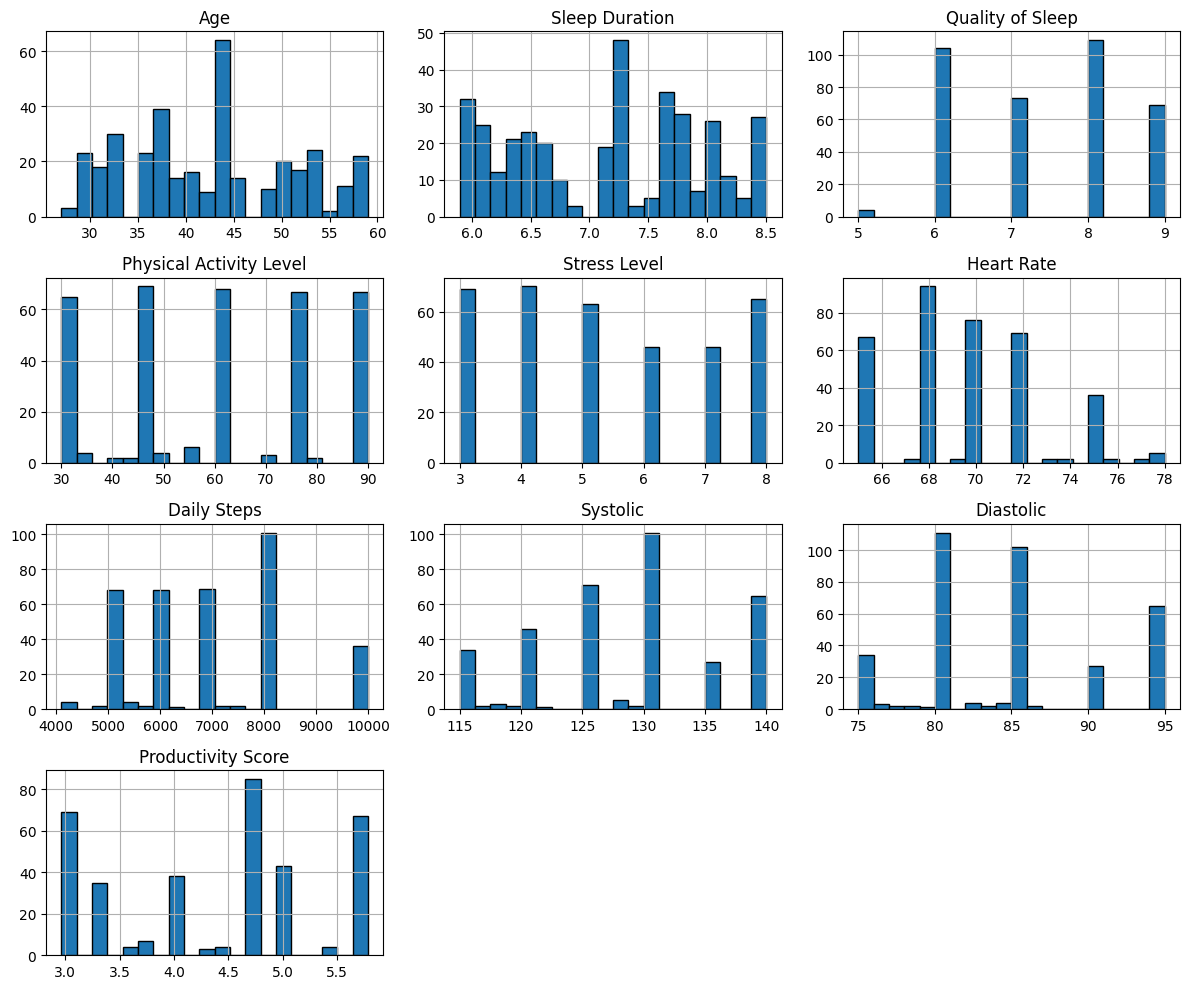

In [17]:
#Histogram Numerical Features
numerik_cols = df.select_dtypes(np.number).columns.tolist()
df[numerik_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')

plt.tight_layout()
plt.show()

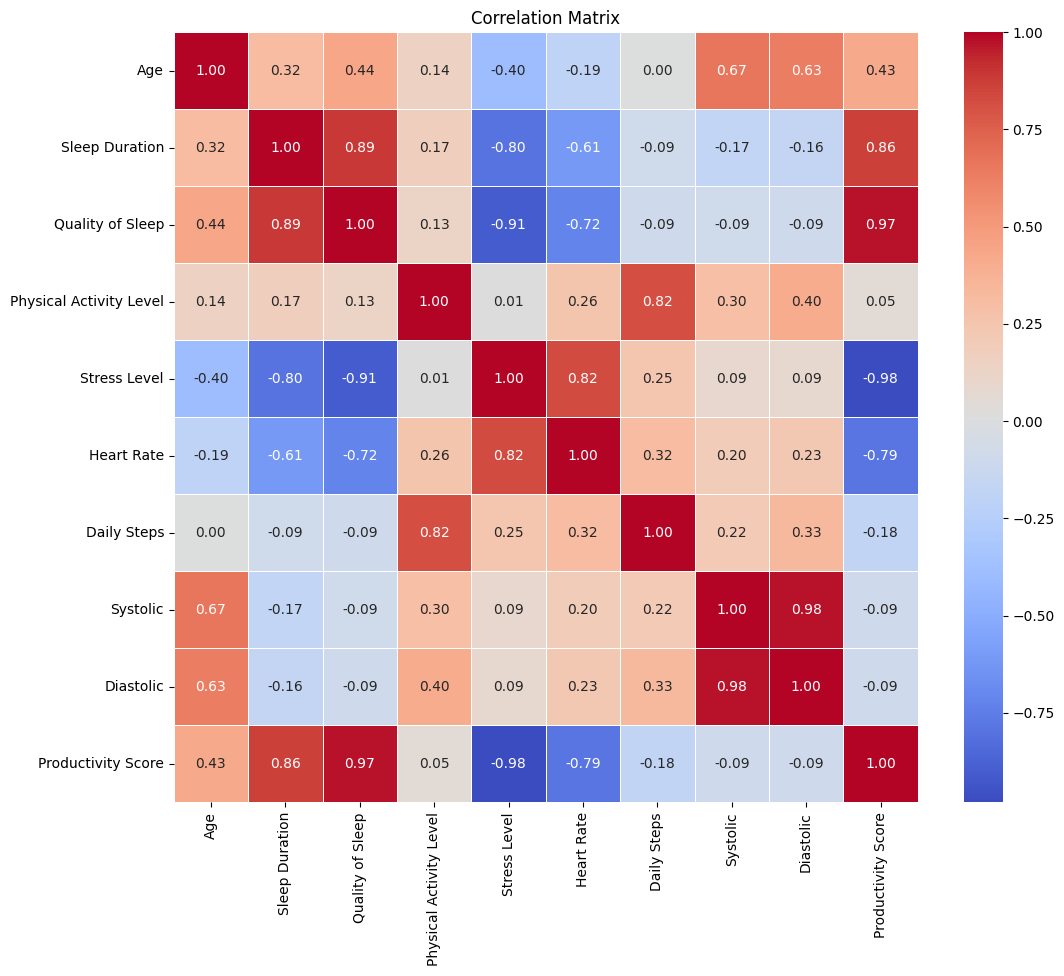

In [18]:
#Heatmap Numerical Features
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **MACHINE LEARNING MODEL (DECISION TREE)**


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Productivity Score
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,3.661
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,3.062
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,3.062
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,4.078
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,4.078


In [20]:
# Group rare occupations as 'other'
value_counts = df['Occupation'].value_counts()
threshold = 10
rare_categories = value_counts[value_counts < threshold].index

df['Occupation_grouped'] = df['Occupation'].replace(rare_categories, 'Other')
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Productivity Score,Occupation_grouped
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,3.661,Other
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,3.062,Doctor
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,3.062,Doctor
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,4.078,Doctor
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,4.078,Doctor


In [21]:
# FIX BMI DUPLICATION
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df['BMI Category'].unique()

array(['Overweight', 'Normal'], dtype=object)

In [22]:
# ONE HOT ENCODING
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df_encoded = pd.get_dummies(df_encoded, columns=['Occupation_grouped'], prefix='occ')
df_encoded = pd.get_dummies(df_encoded, columns=['Sleep Disorder'])
df_encoded = pd.get_dummies(df_encoded, columns=['BMI Category'])
df_encoded = df_encoded.drop(['Occupation', 'Blood Pressure', 'Sleep Disorder_None'], axis=1)

In [23]:
df_encoded.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Productivity Score,...,occ_Engineer,occ_Lawyer,occ_Nurse,occ_Other,occ_Salesperson,occ_Teacher,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,BMI Category_Normal,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,126,83,3.661,...,False,False,False,True,False,False,False,False,False,True
1,28,6.2,6,60,8,75,10000,125,80,3.062,...,False,False,False,False,False,False,False,False,True,False
2,28,6.2,6,60,8,75,10000,125,80,3.062,...,False,False,False,False,False,False,False,False,True,False
7,29,7.8,7,75,6,70,8000,120,80,4.078,...,False,False,False,False,False,False,False,False,True,False
8,29,7.8,7,75,6,70,8000,120,80,4.078,...,False,False,False,False,False,False,False,False,True,False


In [24]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 373
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         359 non-null    int64  
 1   Sleep Duration              359 non-null    float64
 2   Quality of Sleep            359 non-null    int64  
 3   Physical Activity Level     359 non-null    int64  
 4   Stress Level                359 non-null    int64  
 5   Heart Rate                  359 non-null    int64  
 6   Daily Steps                 359 non-null    int64  
 7   Systolic                    359 non-null    int64  
 8   Diastolic                   359 non-null    int64  
 9   Productivity Score          359 non-null    float64
 10  Gender_Male                 359 non-null    bool   
 11  occ_Accountant              359 non-null    bool   
 12  occ_Doctor                  359 non-null    bool   
 13  occ_Engineer                359 non-null

In [25]:
tree = DecisionTreeRegressor(max_depth= 2, random_state=1)
x = df_encoded.drop('Productivity Score', axis=1)
y = df_encoded['Productivity Score']

In [26]:
# SPLIT
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1
)

In [27]:
# TRAIN
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [28]:
# PREDICT
y_pred = tree.predict(x_test)

In [29]:
# EVALUATE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

scores = cross_val_score(tree, x, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", scores)
print("Mean R²:", np.mean(scores))


Mean Squared Error: 0.02
R² Score: 0.98
Cross-validation R² scores: [ 0.90735157  0.76125435  0.91006106  0.95869584 -0.18967251]
Mean R²: 0.6695380610472922


# **MACHINE LEARNING MODEL (LINEAR REGRESSION)**

In [30]:
from sklearn.linear_model import LinearRegression

df_encoded.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Productivity Score,...,occ_Engineer,occ_Lawyer,occ_Nurse,occ_Other,occ_Salesperson,occ_Teacher,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,BMI Category_Normal,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,126,83,3.661,...,False,False,False,True,False,False,False,False,False,True
1,28,6.2,6,60,8,75,10000,125,80,3.062,...,False,False,False,False,False,False,False,False,True,False
2,28,6.2,6,60,8,75,10000,125,80,3.062,...,False,False,False,False,False,False,False,False,True,False
7,29,7.8,7,75,6,70,8000,120,80,4.078,...,False,False,False,False,False,False,False,False,True,False
8,29,7.8,7,75,6,70,8000,120,80,4.078,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# TRAIN

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# EVALUATE

y_pred = model_lr.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Test R² Score: {r2:.3f}")
print(f"Test Mean Squared Error: {mse:.3f}")

Test R² Score: 1.000
Test Mean Squared Error: 0.000


In [40]:
x.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic',
       'Gender_Male', 'occ_Accountant', 'occ_Doctor', 'occ_Engineer',
       'occ_Lawyer', 'occ_Nurse', 'occ_Other', 'occ_Salesperson',
       'occ_Teacher', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'BMI Category_Normal', 'BMI Category_Overweight'],
      dtype='object')

In [35]:
cv_scores = cross_val_score(model_lr, x, y, cv=5, scoring='r2')
print("CV R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

CV R² scores: [1. 1. 1. 1. 1.]
Mean CV R²: 1.0


# **MACHINE LEARNING MODEL (RANDOM FOREST)**

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
# CREATE MODEL
model_rf = RandomForestRegressor(
    n_estimators=300,   # TREE AMOUNT
    max_depth=4,     # TREE DEPTH
    random_state=1,
)

In [80]:
# TRAIN
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=300, random_state=1)

In [81]:
# EVALUATE
y_pred_rf = model_rf.predict(x_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Test R²: {r2_rf:.3f}")
print(f"Random Forest Test MSE: {mse_rf:.3f}")

Random Forest Test R²: 0.999
Random Forest Test MSE: 0.001


In [82]:
# CROSS VALIDATION
cv_scores_rf = cross_val_score(model_rf, x, y, cv=5, scoring='r2')
print("CV R² scores:", cv_scores_rf)
print("Mean CV R²:", cv_scores_rf.mean())
print("Std CV R²:", cv_scores_rf.std())

CV R² scores: [0.86370846 0.95516111 0.97500324 0.98709117 0.69687469]
Mean CV R²: 0.8955677334397147
Std CV R²: 0.10838066945268661


## RESULTS
### Tree Depth = 1
R²: 0.777

CV R² scores: [ 0.56897031  0.52495947  0.43439463  0.72273916 -0.81515639]

Mean CV R²: 0.2871814387357884

Std CV R²: 0.5590123968785518

### Tree Depth = 2
R²: 0.977

CV R² scores: [ 0.93416932  0.75174258  0.9090178   0.96420607 -0.11936395]

Mean CV R²: 0.6879543627774567

Std CV R²: 0.4102773811625991

### Tree Depth = 3
R²: 0.998

CV R² scores: [0.91134408 0.94948748 0.97147709 0.96577914 0.48224769]

Mean CV R²: 0.8560670965837257

Std CV R²: 0.18808512144489908